┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 24.61 (χ²/ndof = 1.1)      │              Nfcn = 106              │
│ EDM = 1.19e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ Rm   │   4.781   │   0.006   │            │            │         │         │       │
│ 1 │ R    │   0.054   │   0.006   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────┐
│    │       Rm        R │
├────┼───────────────────┤
│ Rm │ 3.97e-05 0.002e-3 │
│  R │ 0.002e-3 3.53e-05 │
└────┴───────────────────┘

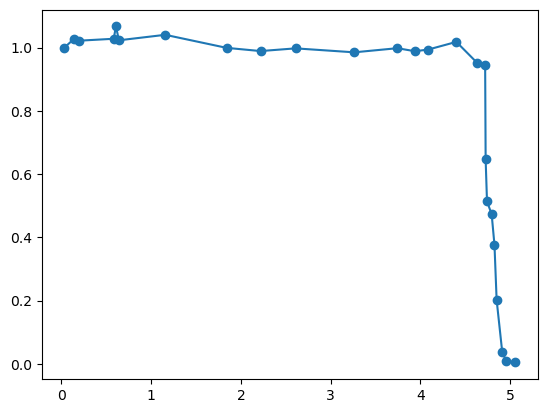

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
from iminuit.cost import ExtendedBinnedNLL, LeastSquares
from scipy.stats import norm


Vtotlto=4.375
h = 5.38 #cm
Vo = 4.964
po = 1000 #mbar
V = [0.03, 0.129, 0.178, 0.537, 0.560, 0.591,  1.067, 1.698, 2.047, 2.407, 3.01, 3.453, 3.634, 3.771, 4.06, 4.273, 4.356, 4.361, 4.375, 4.423, 4.452, 4.474, 4.531, 4.573, 4.666] #volt

p = list(map(lambda x: po*x/Vo, V)) 
xeq = list(map(lambda x: x*h/po, p))
I=[]
err=.6e-1
ch = []

for i in range(len(V)):
    
    raw_data = np.loadtxt(r"C:\Users\lenovo\Desktop\AlfaRuth24-25_S1\range\range_"+str(V[i])+".dat")
    
    data1 = []
    signal=[]
    
    for i in range(len(raw_data)):
        for j in range(int(raw_data[i])):
            data1.append(i)
    
    data = np.array(data1)

    for i in range(len(data)):
        if data[i] > max(0, np.argmax(raw_data)-300-20*i) and data[i] < np.argmax(raw_data)+300+20*i : signal.append(data[i])

    #print(np.argmax(raw_data))
    
    bin_content, bin_edges= np.histogram(signal, bins=10)
    I.append(sum(bin_content))
    ch.append(np.argmax(raw_data))
    #plt.axvline(x=np.argmax(raw_data), color="red")
    #plt.show()

Io=I[0]

y = list(map(lambda x: x/Io, I))
i=10
plt.plot(xeq, y, linestyle="-", marker="o")
func = lambda x, Rm, R: 1/(1+np.e**((x-Rm)/R))
least_squares = LeastSquares (xeq, y, err, func)
my_minuit = Minuit (least_squares, Rm=4, R=0.08) 
my_minuit.migrad ()  
my_minuit.hesse ()
#display(my_minuit)


In [114]:
#curva calibrazione dati En = a * ch + b per 50mm2
a = 0.0011254056672008671 
erra = 4.844870327965148e-07 
b = -0.07391854484382687 
errb = 0.002425539695977177

E = list(map(lambda x: x*a + b, ch))
#print(E)
Delta_E = []
Delta_x = []

for i in range(1, len(E)):
    Delta_E.append(-E[i]+E[i-1])
    Delta_x.append(xeq[i]-xeq[i-1])

y=[]
x=[]
print(len(Delta_E), len(xeq))
#print(Delta_E, Delta_x)
for i in range(len(Delta_E)):
    if (Delta_E[i]/Delta_x[i])<20:
        y.append(Delta_E[i]/Delta_x[i])
        x[i]=xeq[i]
        
#print(len(y), len(xeq))

plt.scatter(xeq[1:], y)

func = lambda x, po, Rm, R: po/(1+np.e**((x-Rm)/R))
least_squares = LeastSquares (x, y, err, func)
my_minuit = Minuit (least_squares, po=1, Rm=0, R=0) 
#my_minuit.migrad ()  
#my_minuit.hesse ()
#display(my_minuit)


Potere_frenante = sum(y[0:3])/len(y[0:3])
print(Potere_frenante)

24 25


IndexError: list assignment index out of range